In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from doubleauction.util import generate_seller_prices_paper, generate_buyer_prices_paper

In [9]:
from doubleauction.util import plot_price_curves
from doubleauction.util import compute_equilibrium_price

Equilibrium price range:
(110.04485388987302, 110.19769256011287)


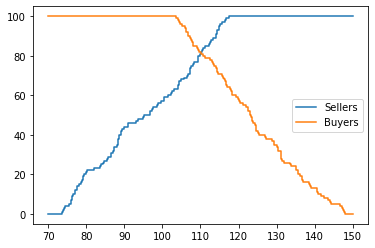

In [10]:
sellers = generate_seller_prices_paper(100)
buyers = generate_buyer_prices_paper(100)

plot_price_curves(buyers, sellers)
plt.legend()

print("Equilibrium price range:")
print(compute_equilibrium_price(buyers, sellers))

In [11]:
def compute_cdf(values, start, end):
    values2 = np.sort(np.append(values, [start, end]))
    
    ii = np.arange(0, len(values)+1)
    ii = np.append(ii, [len(values)])
    
    return values2, ii

def compute_equilibrium_price(buyers, sellers):
    vv, ii = compute_cdf(sellers, 0, max(sellers.max(), buyers.max()) + 1)
    
    vv2, ii2 = compute_cdf(buyers, 0, max(sellers.max(), buyers.max()) + 1)
    vv2, ii2 = np.flip(vv2), len(buyers) - np.flip(ii2)
    
    if len(vv) > len(vv2):
        delta = len(vv) - len(vv2)
        vv2 = np.pad(vv2, (0,delta), 'edge')
        ii2 = np.pad(ii2, (0,delta), 'edge')
    elif len(vv2) > len(vv):
        delta = len(vv2) - len(vv)
        vv = np.pad(vv, (0,delta), 'edge')
        ii = np.pad(ii, (0,delta), 'edge')
    
    test = (vv2 <= vv)
    if not np.any(test):
        return None
    else:
        d = np.argmax(test)
        
        return (max(vv[d-1], vv2[d]), min(vv2[d-1], vv[d]))
    

Equilibrium price range:
(131.32135409307256, 131.58053966082335)


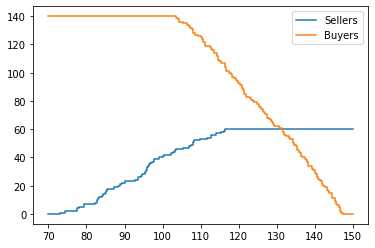

In [22]:
sellers = generate_seller_prices_paper(60)
buyers = generate_buyer_prices_paper(140)

plot_price_curves(buyers, sellers)
plt.legend()

print("Equilibrium price range:")
print(compute_equilibrium_price(buyers, sellers))

Equilibrium price range:
(94.16504699114202, 94.23182617972466)


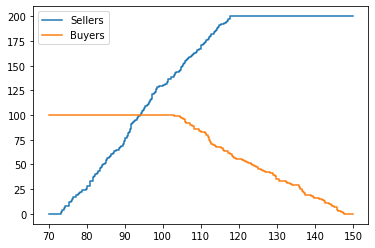

In [13]:
sellers = generate_seller_prices_paper(200)
buyers = generate_buyer_prices_paper(100)

plot_price_curves(buyers, sellers)
plt.legend()

print("Equilibrium price range:")
print(compute_equilibrium_price(buyers, sellers))